# Data Preparation
## Imports

In [1]:
# Data visualization
from IPython.display import Image
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



## Load the training data

In [2]:
student_filepath= "train.csv"
df = pd.read_csv(student_filepath)
df

Id      Program  Y0s1_enrol  Y0s2_enrol  Y1s1_enrol  \
0     131386709   Management        46.0        30.0        36.5   
1     111354305      Nursing        30.0        24.0        30.0   
2     111345828      Nursing        30.0        40.0        26.0   
3     131393682      Biology         0.0         6.0        20.0   
4     131383677  Informatics        41.0        36.0        36.0   
...         ...          ...         ...         ...         ...   
1841  131386328      Nursing        30.0        30.0        30.0   
1842  131395023   Management         6.0        12.0         6.0   
1843  111345905      Nursing        30.0        30.0        26.0   
1844  131384002   Management        36.0         0.0        30.0   
1845  131384859      Nursing        36.0         0.0        30.0   

      Y1s1_complete  Y1s1_grade  Y1s2_enrol  Y1s2_complete  Y1s2_grade  ...  \
0              36.5      11.452        36.0           36.0      13.236  ...   
1              30.0      14.933        30.0           30.0      17.333  ...   
2              26.0      17.000        20.0           10.0      16.000  ...   
3              14.0      12.286        12.0            0.0       0.000  ...   
4              19.0      14.053        48.0           30.0      12.400  ...   
...             ...         ...         ...            ...         ...  ...   
1841           30.0      15.067        30.0           30.0      16.667  ...   
1842            0.0       0.000        30.0            0.0       0.000  ...   
1843           26.0      14.462        20.0           20.0      14.500  ...   
1844           24.0      13.125        30.0           12.0      12.000  ...   
1845           30.0      16.667        30.0           30.0      17.100  ...   

      Y4s1_enrol  Y4s1_complete  Y4s1_grade  Y4s2_enrol  Y4s2_complete  \
0            0.0            0.0       0.000         0.0            0.0   
1            0.0            0.0       0.000         0.0            0.0   
2            0.0            0.0       0.000         0.0            0.0   
3           28.0           28.0      11.750        42.0           36.0   
4            0.0            0.0       0.000         0.0            0.0   
...          ...            ...         ...         ...            ...   
1841         0.0            0.0       0.000         0.0            0.0   
1842        29.0            6.0      12.000        35.0            6.0   
1843         0.0            0.0       0.000         0.0            0.0   
1844         0.0            0.0       0.000         0.0            0.0   
1845        33.0           33.0      14.879        27.0           27.0   

      Y4s2_grade  Rest_enrol  Rest_complete  Rest_grade  Failure  
0          0.000         0.0            0.0         0.0        0  
1          0.000         0.0            0.0         0.0        0  
2          0.000         0.0            0.0         0.0        0  
3         11.833         0.0            0.0         0.0        0  
4          0.000         0.0            0.0         0.0        0  
...          ...         ...            ...         ...      ...  
1841       0.000         0.0            0.0         0.0        0  
1842      12.000         0.0            0.0         0.0        1  
1843       0.000         0.0            0.0         0.0        0  
1844       0.000         0.0            0.0         0.0        1  
1845      14.556         0.0            0.0         0.0        0  

[1846 rows x 32 columns]

## Check dataset for missing values
* To deal with rows that have missing values we remove those rows from the dataframe.
* In this case there aren't any rows with missing values.

In [3]:
df.isnull().sum()

Id               0
Program          0
Y0s1_enrol       0
Y0s2_enrol       0
Y1s1_enrol       0
Y1s1_complete    0
Y1s1_grade       0
Y1s2_enrol       0
Y1s2_complete    0
Y1s2_grade       0
Y2s1_enrol       0
Y2s1_complete    0
Y2s1_grade       0
Y2s2_enrol       0
Y2s2_complete    0
Y2s2_grade       0
Y3s1_enrol       0
Y3s1_complete    0
Y3s1_grade       0
Y3s2_enrol       0
Y3s2_complete    0
Y3s2_grade       0
Y4s1_enrol       0
Y4s1_complete    0
Y4s1_grade       0
Y4s2_enrol       0
Y4s2_complete    0
Y4s2_grade       0
Rest_enrol       0
Rest_complete    0
Rest_grade       0
Failure          0
dtype: int64

# Data processing
## Visualizing the data
### Heatmap
By observing the values in the bottom row of the heatmap we can see that the features that have a value of -0.45 or lower can be considered to have a substancial negative correlation with the target feature ('Failure').

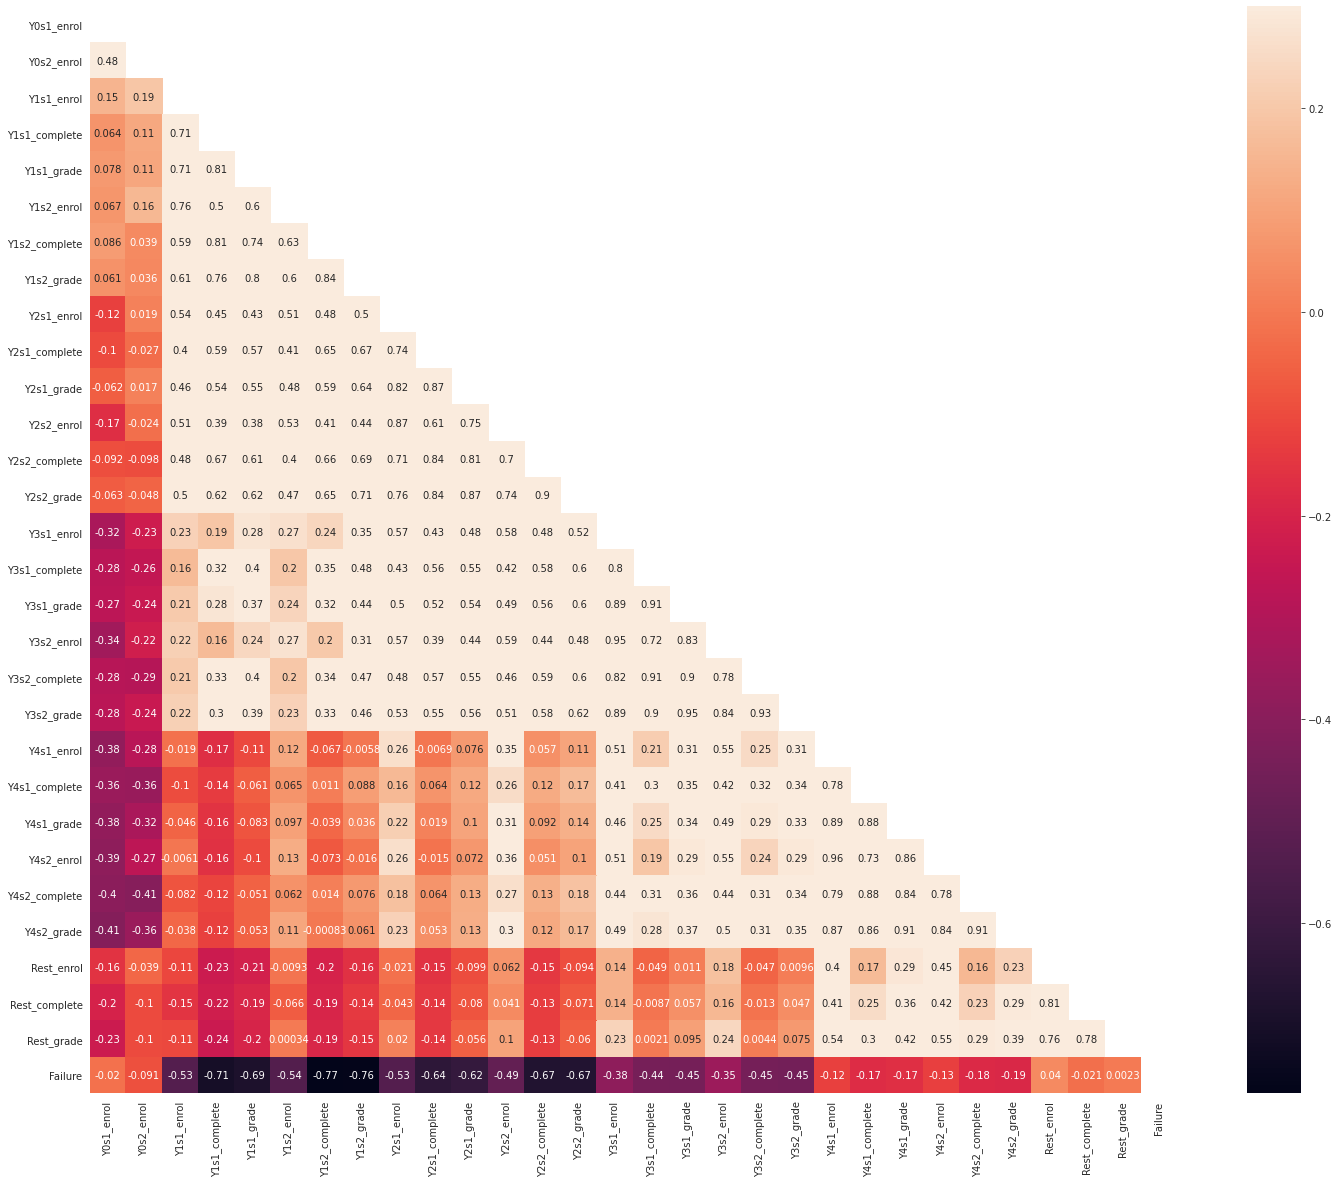

In [4]:
# Find correlation values between each feature and the target feature('Failure')
# Filter out features that are not numerical
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf = newdf.drop(columns="Id")

corr = newdf.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(25, 20))

    ax = sns.heatmap(corr, mask=mask,annot=True, vmax=.3, square=True)



## Pairplot
* Because creating a pair plot using every feature in the dataframe would take a really long time we only use the features with the highest absolute correlation value with the target feature.

### By analysing the pair plot we can see that:
* in most cases the numerical features do not have a gaussian distribution.
* there are some combinations of attributes that are linearly related.
* there are some combinations of attributes that have easily separable clusters. 

Because of the number of features the pairplot may take some time to compute.

In order to generate the pair plot uncomment the cell below and run this cell.


In [5]:
#plot_df= pd.concat([df.iloc[:,4:-13],df.iloc[:,-1]],axis=1)
# dp = sns.pairplot(plot_df,hue="Failure")

Here is the pairplot in the form of an external image. I included the generated pairplot so we could observe and analyse the plot without having to run the code in the cell above because that would've significantly increased the notebook size.  

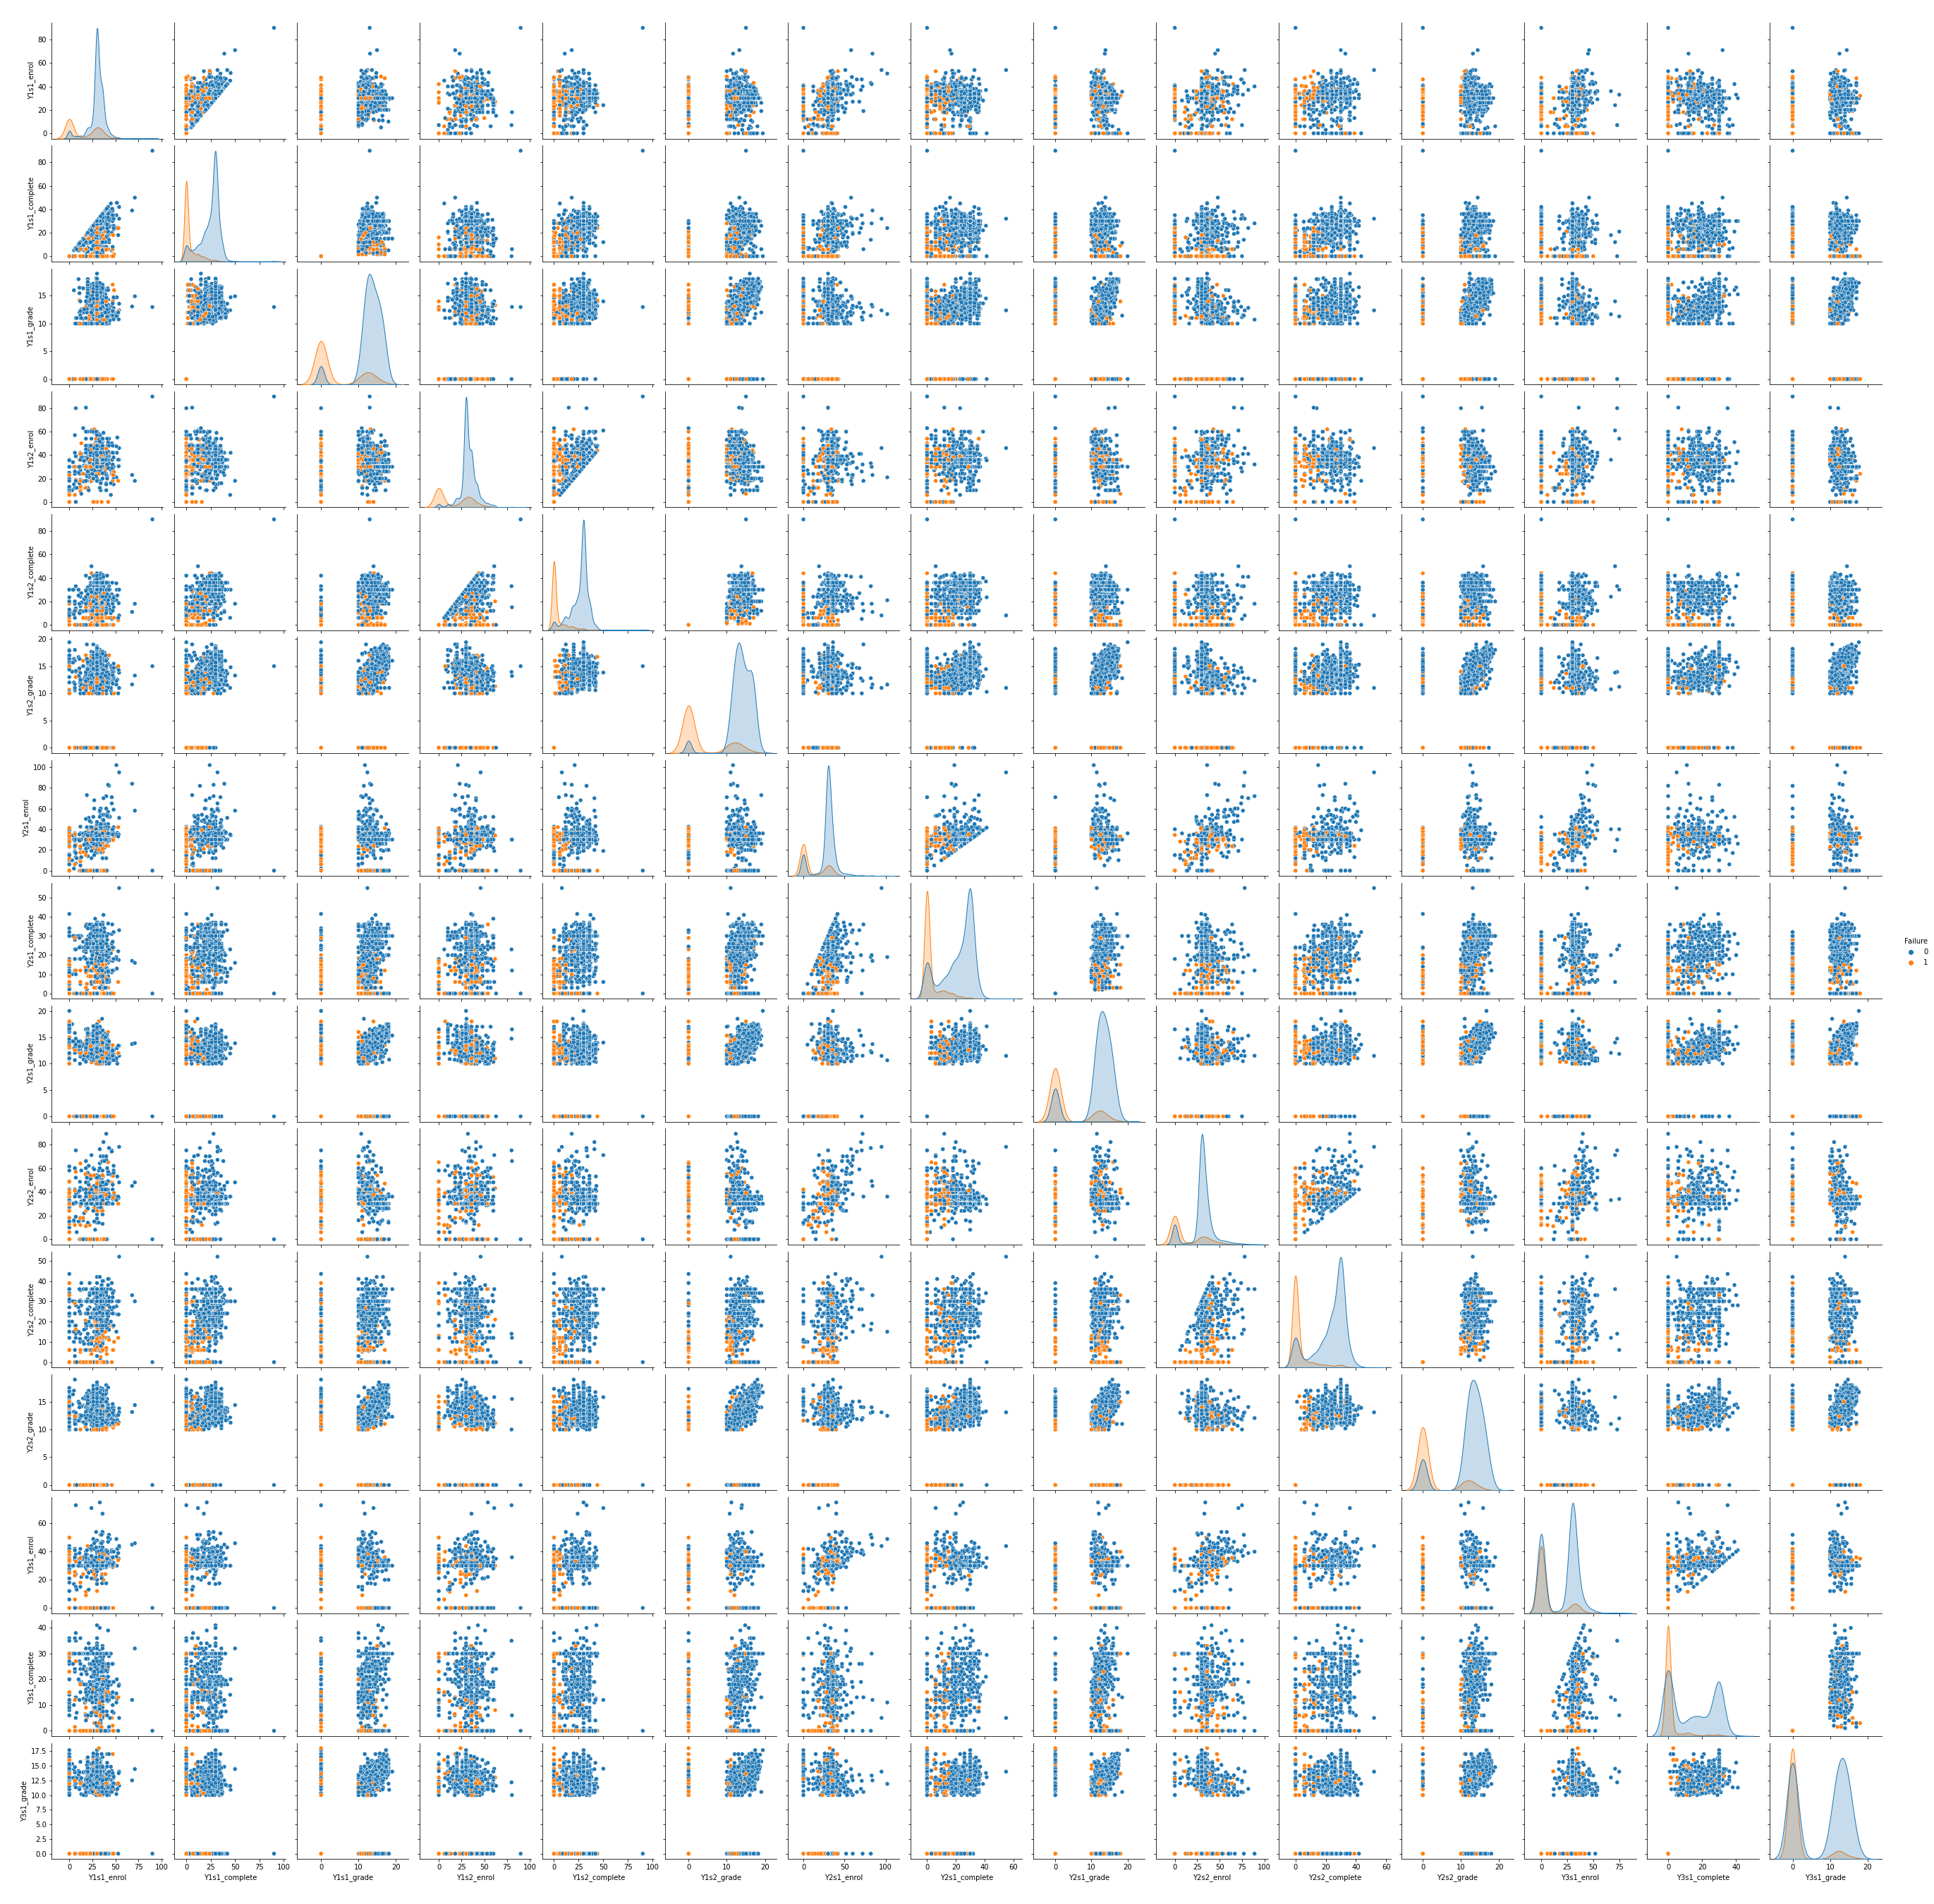

In [6]:
Image(filename='42470_pairplot.png')

## Enconding categorical features 
We need to encode all the features that are not numerical so that the models can use them.

In [7]:
df_no_categorical = pd.get_dummies(df.drop(columns=['Id']), columns =['Program'])
col = df_no_categorical.pop('Failure')
df_no_categorical.insert(33,'Failure',col)
df_no_categorical.head()

Y0s1_enrol  Y0s2_enrol  Y1s1_enrol  Y1s1_complete  Y1s1_grade  Y1s2_enrol  \
0        46.0        30.0        36.5           36.5      11.452        36.0   
1        30.0        24.0        30.0           30.0      14.933        30.0   
2        30.0        40.0        26.0           26.0      17.000        20.0   
3         0.0         6.0        20.0           14.0      12.286        12.0   
4        41.0        36.0        36.0           19.0      14.053        48.0   

   Y1s2_complete  Y1s2_grade  Y2s1_enrol  Y2s1_complete  ...  Y4s2_complete  \
0           36.0      13.236        30.0            7.5  ...            0.0   
1           30.0      17.333        30.0           30.0  ...            0.0   
2           10.0      16.000        32.0           32.0  ...            0.0   
3            0.0       0.000        14.0           14.0  ...           36.0   
4           30.0      12.400        33.0            9.0  ...            0.0   

   Y4s2_grade  Rest_enrol  Rest_complete  Rest_grade  Program_Biology  \
0       0.000         0.0            0.0         0.0                0   
1       0.000         0.0            0.0         0.0                0   
2       0.000         0.0            0.0         0.0                0   
3      11.833         0.0            0.0         0.0                1   
4       0.000         0.0            0.0         0.0                0   

   Program_Informatics  Program_Management  Program_Nursing  Failure  
0                    0                   1                0        0  
1                    0                   0                1        0  
2                    0                   0                1        0  
3                    0                   0                0        0  
4                    1                   0                0        0  

[5 rows x 34 columns]

## Data scaling
Since the data  has varying scales we will normalize the data to increase the speed of some of the models that we use.
We tried running all the code below without normalizing the data and the scores were, for the most part, significantly lower.

In [8]:
scale_features = df_no_categorical.columns.tolist()
scale_features = scale_features[:-1]

df_no_categorical[scale_features] = MinMaxScaler().fit_transform(df_no_categorical[scale_features])
df_no_categorical.head()

Y0s1_enrol  Y0s2_enrol  Y1s1_enrol  Y1s1_complete  Y1s1_grade  Y1s2_enrol  \
0    0.730159    0.322581    0.405556       0.405556    0.602737    0.400000   
1    0.476190    0.258065    0.333333       0.333333    0.785947    0.333333   
2    0.476190    0.430108    0.288889       0.288889    0.894737    0.222222   
3    0.000000    0.064516    0.222222       0.155556    0.646632    0.133333   
4    0.650794    0.387097    0.400000       0.211111    0.739632    0.533333   

   Y1s2_complete  Y1s2_grade  Y2s1_enrol  Y2s1_complete  ...  Y4s2_complete  \
0       0.400000    0.682268    0.294118       0.136364  ...       0.000000   
1       0.333333    0.893454    0.294118       0.545455  ...       0.000000   
2       0.111111    0.824742    0.313725       0.581818  ...       0.000000   
3       0.000000    0.000000    0.137255       0.254545  ...       0.610169   
4       0.333333    0.639175    0.323529       0.163636  ...       0.000000   

   Y4s2_grade  Rest_enrol  Rest_complete  Rest_grade  Program_Biology  \
0    0.000000         0.0            0.0         0.0              0.0   
1    0.000000         0.0            0.0         0.0              0.0   
2    0.000000         0.0            0.0         0.0              0.0   
3    0.688566         0.0            0.0         0.0              1.0   
4    0.000000         0.0            0.0         0.0              0.0   

   Program_Informatics  Program_Management  Program_Nursing  Failure  
0                  0.0                 1.0              0.0        0  
1                  0.0                 0.0              1.0        0  
2                  0.0                 0.0              1.0        0  
3                  0.0                 0.0              0.0        0  
4                  1.0                 0.0              0.0        0  

[5 rows x 34 columns]

## Splitting the data

In [9]:
X = df_no_categorical.drop(columns="Failure")
y = df_no_categorical["Failure"]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Testing various models
In this section we use the training data to fit and evaluate some of the classification models in the scikit-learn library.


## Linear models

In [10]:
model_ridge = RidgeClassifier().fit(X_train,y_train)
print(f"Ridge model score: {model_ridge.score(X_test,y_test)}\nRidge f1: {f1_score(y_test,model_ridge.predict(X_test))}\n")

model_sgdc = SGDClassifier().fit(X_train,y_train)
print(f"SGDC model score: {model_sgdc.score(X_test,y_test)}\nSGDC f1: {f1_score(y_test,model_sgdc.predict(X_test))}")

Ridge model score: 0.9458874458874459
Ridge f1: 0.8927038626609443

SGDC model score: 0.9415584415584416
SGDC f1: 0.8778280542986425


## Support Vector Machines

In [11]:
model_svm = SVC().fit(X_train,y_train)
print(f"SVM model score: {model_svm.score(X_test,y_test)}\nSVM f1: {f1_score(y_test,model_svm.predict(X_test))}\n")

model_nusvc = NuSVC().fit(X_train,y_train)
print(f"NuSVC model score: {model_nusvc.score(X_test,y_test)}\nNuSVC f1: {f1_score(y_test,model_nusvc.predict(X_test))}\n")

model_lsvc = LinearSVC().fit(X_train,y_train)
print(f"LinearSVC model score: {model_lsvc.score(X_test,y_test)}\nLinearSVC f1: {f1_score(y_test,model_lsvc.predict(X_test))}")

SVM model score: 0.9285714285714286
SVM f1: 0.8571428571428571

NuSVC model score: 0.9112554112554112
NuSVC f1: 0.8056872037914692

LinearSVC model score: 0.948051948051948
LinearSVC f1: 0.896551724137931


## Nearest Neighbors

In [12]:
model_knn = KNeighborsClassifier().fit(X_train,y_train)
print(f"KNN model score: {model_knn.score(X_test,y_test)}\nKNN f1: {f1_score(y_test,model_knn.predict(X_test))}")

KNN model score: 0.9242424242424242
KNN f1: 0.8471615720524018


In [13]:
model_nc = NearestCentroid().fit(X_train,y_train)
print(f"NC model score: {model_nc.score(X_test,y_test)}\nNC f1: {f1_score(y_test,model_nc.predict(X_test))}")

NC model score: 0.8722943722943723
NC f1: 0.7806691449814127


## Gaussian Process

In [14]:
model_gp = GaussianProcessClassifier().fit(X_train,y_train)
print(f"KNN model score: {model_gp.score(X_test,y_test)}\nGP f1: {f1_score(y_test,model_gp.predict(X_test))}")

KNN model score: 0.9264069264069265
GP f1: 0.8534482758620691


## Naive Bayes

In [15]:
model_gnb = GaussianNB().fit(X_train,y_train)
print(f"GaussianNB model score: {model_gnb.score(X_test,y_test)}\nGNB f1: {f1_score(y_test,model_gnb.predict(X_test))}\n")

model_mnb = MultinomialNB().fit(X_train,y_train)
print(f"MultinomialNB model score: {model_mnb.score(X_test,y_test)}\nMNB f1: {f1_score(y_test,model_mnb.predict(X_test))}\n")

model_cnb = ComplementNB().fit(X_train,y_train)
print(f"ComplementNB model score: {model_cnb.score(X_test,y_test)}\nCNB f1: {f1_score(y_test,model_cnb.predict(X_test))}")

GaussianNB model score: 0.8679653679653679
GNB f1: 0.7715355805243446

MultinomialNB model score: 0.8441558441558441
MNB f1: 0.6949152542372881

ComplementNB model score: 0.8571428571428571
CNB f1: 0.7500000000000001


## Decision Trees

In [16]:
model_dt = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
print(f"DecisionTreeClassifier: model score: {model_dt.score(X_test,y_test)}\nKNN f1: {f1_score(y_test,model_dt.predict(X_test))}")

DecisionTreeClassifier: model score: 0.9177489177489178
KNN f1: 0.845528455284553


## Emsemble Methods

In [17]:
model_rf = RandomForestClassifier(random_state=1).fit(X_train,y_train)
print(f"RandomForestClassifier: model score: {model_rf.score(X_test,y_test)}\nRF f1: {f1_score(y_test,model_rf.predict(X_test))}")

RandomForestClassifier: model score: 0.9393939393939394
RF f1: 0.8803418803418804


In [18]:
model_et = ExtraTreesClassifier(random_state=1).fit(X_train,y_train)
print(f"ExtraTreesClassifier: model score: {model_et.score(X_test,y_test)}\nET f1: {f1_score(y_test,model_et.predict(X_test))}")

ExtraTreesClassifier: model score: 0.9242424242424242
ET f1: 0.8471615720524018


In [19]:
model_ab = AdaBoostClassifier(random_state=1).fit(X_train,y_train)
print(f"AdaBoostClassifier: model score: {model_ab.score(X_test,y_test)}\nAB f1: {f1_score(y_test,model_ab.predict(X_test))}")

AdaBoostClassifier: model score: 0.9393939393939394
AB f1: 0.8803418803418804


In [20]:
model_gb = GradientBoostingClassifier(random_state=1).fit(X_train,y_train)
print(f"GradientBoostingClassifier: model score: {model_gb.score(X_test,y_test)}\nGB f1: {f1_score(y_test,model_gb.predict(X_test))}")

GradientBoostingClassifier: model score: 0.9415584415584416
GB f1: 0.8860759493670887


## Neural network

In [21]:
model_mlpc = MLPClassifier(random_state=1).fit(X_train,y_train)
print(f"MLPClassifier: model score: {model_mlpc.score(X_test,y_test)}\nMLPC f1: {f1_score(y_test,model_mlpc.predict(X_test))}")

MLPClassifier: model score: 0.9458874458874459
MLPC f1: 0.8945147679324894


# Best models based on 'f1 score' without tuning the parameters of the models
* Ridge Classification - 0.8927038626609443
* Random Forest - 0.8803418803418804
* Linear SVC - 0.896551724137931
* Neural Network - 0.8945147679324894
* Gradient Boosting - 0.8860759493670887
* AdaBoost - 0.8803418803418804

## Tuning the models
We used GridSearchCV and RandomizedSearchCV to tune the parameters of the best models but most of the time the default parameters yielded the best results. In this cell we list only the tuning that yielded better results.

In [22]:
# Manual Tuning

tuned_model_rf = RandomForestClassifier(random_state=1,max_depth=8,n_jobs=-1).fit(X_train,y_train)
print(f"RandomForestClassifier: model score: {tuned_model_rf.score(X_test,y_test)}\nRF f1: {f1_score(y_test,tuned_model_rf.predict(X_test))}\n")

tuned_model_gb = GradientBoostingClassifier(random_state=1,criterion='mse',n_estimators=500,subsample=0.8,max_depth=7,max_features='log2').fit(X_train,y_train)
print(f"GradientBoostingClassifier: model score: {tuned_model_gb.score(X_test,y_test)}\nGB f1: {f1_score(y_test,tuned_model_gb.predict(X_test))}\n")

tuned_mlpc = MLPClassifier(max_iter=300,random_state=1).fit(X_train,y_train)
print(f"Tuned MLPClassifier: model score: {tuned_mlpc.score(X_test,y_test)}\nTMLPC f1: {f1_score(y_test,tuned_mlpc.predict(X_test))}\n")

# Automatic tuning

# SVC
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
tuned_svc = GridSearchCV(SVC(), param_grid=params, n_jobs=-1)
tuned_svc.fit(X_train,y_train)

print(f"Tuned SVC: model score: {tuned_svc.score(X_test,y_test)}\nTSVC f1: {f1_score(y_test,tuned_svc.predict(X_test))}")

RandomForestClassifier: model score: 0.9415584415584416
RF f1: 0.8860759493670887

GradientBoostingClassifier: model score: 0.9545454545454546
GB f1: 0.9090909090909091

Tuned MLPClassifier: model score: 0.9545454545454546
TMLPC f1: 0.9106382978723403

Tuned SVC: model score: 0.9458874458874459
TSVC f1: 0.8953974895397491


# Dealing with unseen data

## Load and process the new unseen data

In [23]:
unseen_data = pd.read_csv("test.csv")

# Categorical features -> Numerical Features
unseen_data2 = unseen_data.drop(columns=['Id'])
unseen_data2 = pd.get_dummies(unseen_data2, columns =['Program'])

#scale
scale_features = unseen_data2.columns.tolist()
scaler = MinMaxScaler()
unseen_data2[scale_features] = scaler.fit_transform(unseen_data2[scale_features])

## Generating .csv files with the predictions of the top models fitted with the split dataset
The predictions of the top models fitted with the complete dataset yielded lower scores overall.

In [24]:
tuned_model_rf_pred = tuned_model_rf.predict(unseen_data2)
tuned_model_gb_pred = tuned_model_gb.predict(unseen_data2)
tuned_mlpc_pred = tuned_mlpc.predict(unseen_data2)
tuned_svc_pred = tuned_svc.predict(unseen_data2)

predictions = [tuned_model_gb_pred,tuned_model_rf_pred,tuned_svc_pred,tuned_mlpc_pred]
i = 0
for p in predictions:
    pd.DataFrame({'Id': unseen_data["Id"].values, 'Failure': list(p)},columns=['Id','Failure']).to_csv("predictions/t"+str(i)+".csv",sep=',',encoding='utf-8',index=False)
    i= i+1


In [25]:
rc_pred = model_ridge.predict(unseen_data2)
rf_pred = model_rf.predict(unseen_data2)
lsvc_pred = model_lsvc.predict(unseen_data2)
mlpc_pred = model_mlpc.predict(unseen_data2)
gb_pred = model_gb.predict(unseen_data2)
ab_pred = model_ab.predict(unseen_data2)

predictions = [rc_pred,rf_pred,lsvc_pred,mlpc_pred,gb_pred,ab_pred]
i = 0
for p in predictions:
    pd.DataFrame({'Id': unseen_data["Id"].values, 'Failure': list(p)},columns=['Id','Failure']).to_csv("predictions/p"+str(i)+".csv",sep=',',encoding='utf-8',index=False)
    i= i+1


# Best scores in the kaggle competition
Using X_train and y_train:
* MLPClassifier(max_iter=300,random_state=1) - 0.96035 - without scaling data
* GradientBoostingClassifier(random_state=1,criterion='mse',n_estimators=500,subsample=0.8,max_depth=7,max_features='log2') - 0.96503
* GradientBoostingClassifier(random_state=1,n_estimators=500,subsample=0.8).fit(X,y).predict(unseen_data2)- 0.95774
* GradientBoostingClassifier(random_state=1) - 0.95714
* MLPClassifier(random_state=1) - 0.95035


# Conclusion
I think that the predictions yielded by the top 5 models show very good accuracy overall but they tend to become slightly overfitted when we tried to tune the models or fitting them with the whole dataset. There was a lot of room for improvement during the tuning of the parameters for every model and even though the methods GridSearchCV and RandomizedSearchCV (probably due to my inexperience) were used they did not yield better results for the most part. When processing the data if the data was not scaled the only model that saw a significant increase in accuracy was the MLPClassifier.
When fitting the models with the whole dataset there little to none increase in accuracy in all models. 




